In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.mixture import GaussianMixture as GMM
from collections import Counter
from sklearn.metrics import confusion_matrix
import time
import sklearn
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn import random_projection
import gzip
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

In [127]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [128]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Reshape, Conv2DTranspose, Conv2D, MaxPooling2D
from keras.optimizers import RMSprop, Adam
import tensorflow as tf
from tensorflow import keras

from sklearn.metrics.cluster import rand_score
from sklearn.metrics.cluster import adjusted_rand_score

import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [6]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir("/content/drive/MyDrive/Project/")

In [ ]:
def load_mnist(path, kind='train'):    

    """Load MNIST data from `path`"""
    labels_path = os.path.join(path,
                               '%s-labels-idx1-ubyte.gz'
                               % kind)
    images_path = os.path.join(path,
                               '%s-images-idx3-ubyte.gz'
                               % kind)

    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,
                               offset=8)

    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(labels), 784)

    return images, labels   

In [ ]:
X_train, y_train = load_mnist('fashion-mnist-master/data/fashion', kind='train')
X_test, y_test = load_mnist('fashion-mnist-master/data/fashion', kind='t10k')

In [ ]:
X_train.shape

(60000, 784)

In [ ]:
y_train.shape

(60000,)

In [ ]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
X_test.shape

(10000, 784)

In [ ]:
y_test.shape

(10000,)

In [ ]:
np.sqrt(784)

28.0

In [ ]:
def plot_image(data, figsize=(28, 28), reshape_value=28):
    fig, ax = plt.subplots(8, 8, figsize=figsize,
                           subplot_kw=dict(xticks=[], yticks=[]))
    fig.subplots_adjust(hspace=0.05, wspace=0.05)
    for i, axi in enumerate(ax.flat):
        im = axi.imshow(data[i].reshape(reshape_value, reshape_value), cmap='binary')
    

In [ ]:
plot_image(X_train)

NameError: ignored

# Labels
Each training and test example is assigned to one of the following labels:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

(array([[3.92156863e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.92150327e-02, 6.53594771e-07, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.92098039e-02, 2.61437908e-06, 2.61437908e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [3.80862745e-02, 3.26797386e-04, 2.47058824e-04, ...,
         5.22875817e-05, 2.41830065e-05, 7.84313725e-06],
        [3.88490196e-02, 1.22875817e-04, 8.56209150e-05, ...,
         1.11111111e-05, 3.92156863e-06, 1.96078431e-06],
        [3.91777778e-02, 1.83006536e-05, 1.24183007e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 784 Lists of Patches objects>)

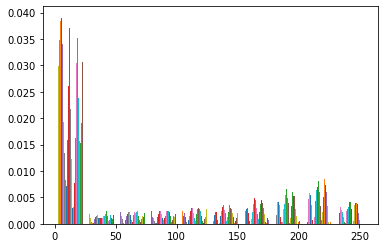

In [ ]:
plt.hist(X_train, density=True)

In [ ]:
def data_2_labels(label_1, label_2):
    train_index = np.where((y_train==label_1)|(y_train==label_2))
    y_train_ = y_train[train_index]
    X_train_ = X_train[train_index]

    test_index = np.where((y_test==label_1)|(y_test==label_2))
    y_test_ = y_test[test_index]
    X_test_ = X_test[test_index]

    return X_train_,y_train_,X_test_,y_test_

In [49]:
def data_4_labels(label_1, label_2, label_3, label_4, x_train, y_train, x_test, y_test):
    train_index = np.where((y_train==label_1)|(y_train==label_2)|(y_train==label_3) |(y_train==label_4))
    y_train_ = y_train[train_index]
    x_train_ = x_train[train_index]

    test_index = np.where((y_test==label_1)|(y_test==label_2)|(y_test==label_3) |(y_test==label_4))
    y_test_ = y_test[test_index]
    x_test_ = x_test[test_index]

    return x_train_,y_train_,x_test_,y_test_

# Divide 3 labels Function


In [14]:
def data_3_labels(label_1, label_2, label_3, x_train, y_train, x_test, y_test):
    train_index = np.where((y_train==label_1)|(y_train==label_2)|(y_train==label_3))
    y_train_ = y_train[train_index]
    x_train_ = x_train[train_index]

    test_index = np.where((y_test==label_1)|(y_test==label_2)|(y_test==label_3))
    y_test_ = y_test[test_index]
    x_test_ = x_test[test_index]

    
    return x_train_, y_train_, x_test_, y_test_

# Split Function

In [13]:
def split(X, y, size=0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=size)
    return X_train, X_test, y_train, y_test

In [ ]:
X_train_t1, X_test_t1, y_train_t1, y_test_t1 = split(X_train, y_train, test_size=0.7, random_state=7)

In [ ]:
X_train_t1.shape

(18000, 784)

In [ ]:
X_train_1_6 , y_train_1_6 , X_test_1_6 , y_test_1_6 = data_2_labels(1, 6)

In [ ]:
X_train_1_6.shape

(12000, 784)

In [ ]:
y_train_1_6.shape

(12000,)

In [ ]:
np.unique(y_train_1_6)

array([1, 6], dtype=uint8)

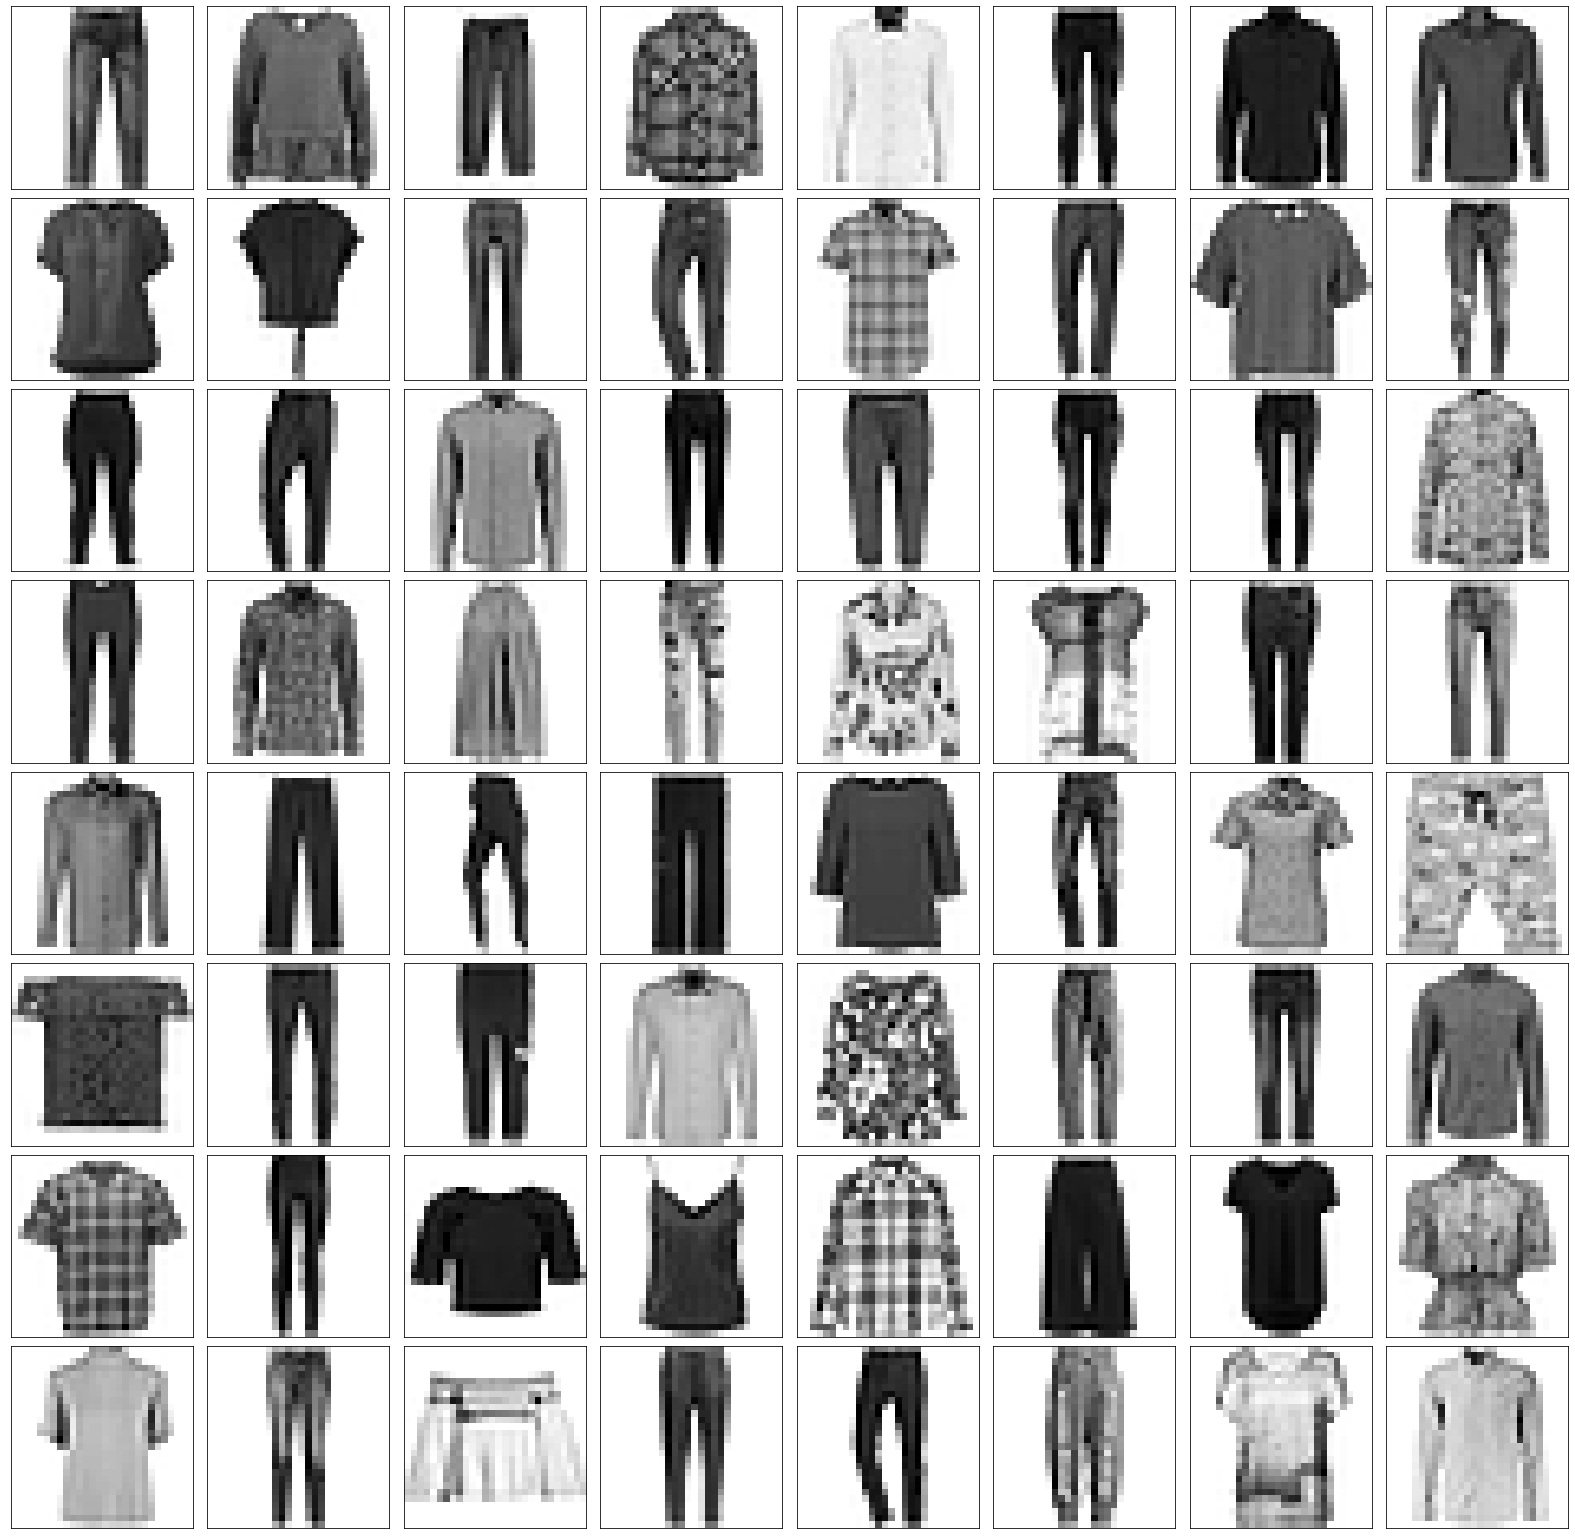

In [ ]:
plot_image(X_train_1_6)

(array([[3.92156863e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.92156863e-02, 0.00000000e+00, 0.00000000e+00, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.92058824e-02, 3.26797386e-06, 6.53594771e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        ...,
        [3.85980392e-02, 2.54901961e-04, 1.14379085e-04, ...,
         1.96078431e-05, 1.30718954e-05, 0.00000000e+00],
        [3.90588235e-02, 7.18954248e-05, 3.26797386e-05, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.91960784e-02, 1.30718954e-05, 3.26797386e-06, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 784 Lists of Patches objects>)

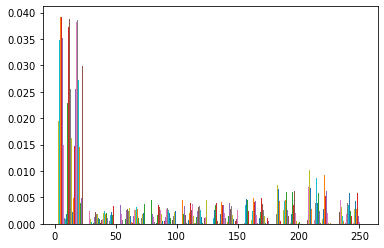

In [ ]:
plt.hist(X_train_1_6, density=True)

In [ ]:
X_train_1_6.shape

(12000, 784)

(array([[1.2000e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.2000e+04, 0.0000e+00, 0.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1997e+04, 1.0000e+00, 2.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        ...,
        [1.1811e+04, 7.8000e+01, 3.5000e+01, ..., 6.0000e+00, 4.0000e+00,
         0.0000e+00],
        [1.1952e+04, 2.2000e+01, 1.0000e+01, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00],
        [1.1994e+04, 4.0000e+00, 1.0000e+00, ..., 0.0000e+00, 0.0000e+00,
         0.0000e+00]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 784 Lists of Patches objects>)

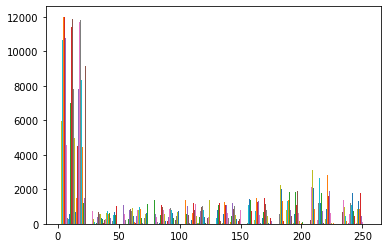

In [ ]:
plt.hist(X_train_1_6)

In [ ]:
pca = PCA(0.995, whiten=True) #n_components = 459
data_pca_ = pca.fit_transform(X_train_1_6)
print(X_train_1_6.shape)
print(data_pca_.shape)

(12000, 784)
(12000, 459)


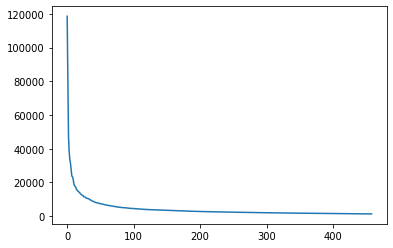

In [ ]:
plt.plot(pca.singular_values_)

In [ ]:
n_components_pca = [100, 200, 400]
models_gmm_pca = [GMM(n, covariance_type='full') for n in n_components_pca]
aics_gmm_pca= [model.fit(data_pca_).aic(data_pca_) for model in models_gmm_pca]

[59107129.78754549, 23777001.42250868]


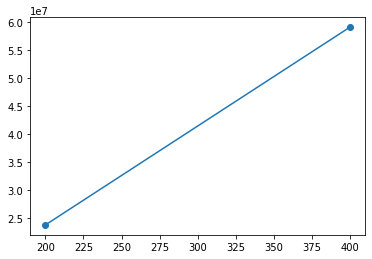

In [ ]:
plt.plot(n_components_pca, aics_gmm_pca)
plt.scatter(n_components_pca, aics_gmm_pca)
print(aics_gmm_pca)

In [ ]:
def acc_train_models(models_, n_components_, transformed_data_, y_):
    i = 0
    for model in models_:
        print("#Components = %d" % (n_components_[i]))
        i = i + 1
        print(transformed_data_.shape)
        pred_ = model.predict(transformed_data_)
        acc_ = accuracy_score(pred_, y_)
        print(acc_)

In [ ]:
def models_GMM_fit_training_aics(n_components_, data_transformed_):
    models_  = [GMM(n, covariance_type='full') for n in n_components_]
    aics_  = [model.fit(data_transformed_).aic(data_transformed_) for model in models_]
    return n_components_, models_, aics_

In [ ]:
acc_train_models(models_= models_gmm_pca, n_components_= n_components_pca, transformed_data_= data_pca_, y_= y_train_1_6)

#Components = 400
(12000, 459)
0.02375
#Components = 200
(12000, 459)
0.00016666666666666666


In [ ]:
rng = np.random.RandomState(7)

# Sparse Random Projections(450) and GMM(2)

In [ ]:
from sklearn.random_projection import SparseRandomProjection

In [ ]:
transformer_s_rnd_projection = SparseRandomProjection(random_state=rng, eps=0.5) # eps=0.5 #n_components=450
data_s_rnd_projection  = transformer_s_rnd_projection.fit_transform(X_train_1_6)
print(X_train_1_6.shape)
print(data_s_rnd_projection.shape)

NameError: ignored

In [ ]:
n_components_s_rnd_projection = [100, 200, 400]
models_gmm_s_rnd_projection  = [GMM(n, covariance_type='full') for n in n_components_s_rnd_projection]
aics_gmm_s_rnd_projection  = [model.fit(data_s_rnd_projection).aic(data_s_rnd_projection) for model in models_gmm_s_rnd_projection]

In [ ]:
plt.plot(n_components_s_rnd_projection, aics_gmm_s_rnd_projection)
plt.scatter(n_components_s_rnd_projection, aics_gmm_s_rnd_projection)
print(aics_gmm_s_rnd_projection)

In [ ]:
acc_train_models(models_= models_gmm_s_rnd_projection, n_components_= n_components_s_rnd_projection, transformed_data_= data_s_rnd_projection, y_= y_train_1_6)

In [ ]:
n_components_s_rnd_projection = [10, 20, 30, 40, 80, 100, 125, 150]
models_gmm_s_rnd_projection  = [GMM(n, covariance_type='full') for n in n_components_s_rnd_projection]
aics_gmm_s_rnd_projection  = [model.fit(data_s_rnd_projection).aic(data_s_rnd_projection) for model in models_gmm_s_rnd_projection]

In [ ]:
plt.plot(n_components_s_rnd_projection, aics_gmm_s_rnd_projection)
plt.scatter(n_components_s_rnd_projection, aics_gmm_s_rnd_projection)
print(aics_gmm_s_rnd_projection)

In [ ]:
acc_train_models(models_= models_gmm_s_rnd_projection, n_components_= n_components_s_rnd_projection, transformed_data_= data_s_rnd_projection, y_= y_train_1_6)

# Gaussian Random Projections(450) and GMM(2)

In [ ]:
from sklearn.random_projection import GaussianRandomProjection

In [ ]:
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 1.0.2.


In [ ]:
transformer_gauss_rnd_projection = GaussianRandomProjection(random_state=rng, eps=0.5) # eps=0.5 #n_components= #compute_inverse_components=True #
data_gauss_rnd_projection  = transformer_gauss_rnd_projection.fit_transform(X_train_1_6)
print(X_train_1_6.shape)
print(data_gauss_rnd_projection.shape)

NameError: ignored

In [ ]:
print(X_train_1_6.shape)
print(data_gauss_rnd_projection.shape)

In [ ]:
n_components_gauss_rnd_projection = [10, 20, 30, 40, 80, 100, 120, 140] 
models_gmm_gauss_rnd_projection  = [GMM(n, covariance_type='full') for n in n_components_gauss_rnd_projection]
aics_gmm_gauss_rnd_projection  = [model.fit(data_gauss_rnd_projection).aic(data_gauss_rnd_projection) for model in models_gmm_gauss_rnd_projection]

In [ ]:
plt.plot(n_components_gauss_rnd_projection, aics_gmm_gauss_rnd_projection)
plt.scatter(n_components_gauss_rnd_projection, aics_gmm_gauss_rnd_projection)
print(aics_gmm_gauss_rnd_projection)

In [ ]:
acc_train_models(models_= models_gmm_gauss_rnd_projection, n_components_= n_components_gauss_rnd_projection, transformed_data_= data_gauss_rnd_projection, y_= y_train_1_6)

In [ ]:
gmm = models_gmm_gauss_rnd_projection[7]

In [ ]:
data_new = gmm.sample(100)
data_new[0].shape

In [ ]:
nm = transformer_gauss_rnd_projection.fit_transform(X_train_1_6)
nm.shape

In [ ]:
transformer_gauss_rnd_projection.n_components_

In [ ]:
# images_new = transformer_gauss_rnd_projection.inverse_transform(nm)
plot_image(nm)

In [ ]:
# 

# Neural Networks Approach


In [130]:
from keras.datasets import mnist
from keras.layers import Dense, Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from keras.models import Model, Sequential
from matplotlib import pyplot as plt
from IPython import display # If using IPython, Colab or Jupyter
import numpy as np

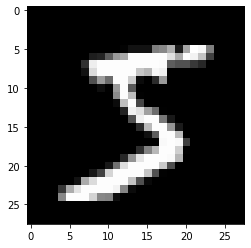

(60000, 28, 28)


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()
LATENT_SIZE = 32

print(x_train.shape)

# encoder = Sequential([
#     Flatten(input_shape = (28, 28)),
#     Dense(512),
#     LR(),
#     Dropout(0.5),
#     Dense(256),
#     LR(),
#     Dropout(0.5),
#     Dense(128),
#     LR(),
#     Dropout(0.5),
#     Dense(64),
#     LR(),
#     Dropout(0.5),
#     Dense(LATENT_SIZE),
#     LR()
# ])

# decoder = Sequential([
#     Dense(64, input_shape = (LATENT_SIZE,)),
#     LR(),
#     Dropout(0.5),
#     Dense(128),
#     LR(),
#     Dropout(0.5),
#     Dense(256),
#     LR(),
#     Dropout(0.5),
#     Dense(512),
#     LR(),
#     Dropout(0.5),
#     Dense(784),
#     Activation("sigmoid"),
#     Reshape((28, 28))
# ])
# img = Input(shape = (28, 28))
# latent_vector = encoder(img)
# output = decoder(latent_vector)
# model = Model(inputs = img, outputs = output)
# model.compile("nadam", loss = "binary_crossentropy")
# EPOCHS = 60

1/1 [==============================] - 0s 16ms/step


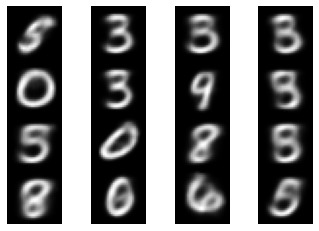

----------- EPOCH 59 -----------
1875/1875 [==============================] - 35s 19ms/step - loss: 0.1903


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()
LATENT_SIZE = 32
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")
EPOCHS = 60
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4)
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    model.fit(x_train, x_train)

In [ ]:


np.random.seed(42)

In [ ]:
# load fashionn mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
x_train = x_train/255.
x_test = x_test/255.

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_test.shape

(10000, 28, 28)

In [ ]:
y_train.shape

(60000,)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_train_modified = y_train.copy()

In [ ]:
def subset_labels_for_tops(my_array):
  my_array[(my_array == 0) | (my_array == 4) | (my_array == 6)] = 0
  return my_array

In [ ]:
y_t_1 = subset_labels_for_tops(y_train_modified)
print(y_t_1.shape)
print(np.unique(y_t_1))

(60000,)
[0 1 2 3 5 7 8 9]


In [ ]:
y_t_1[10:20]

array([0, 9, 5, 5, 7, 9, 1, 0, 0, 0], dtype=uint8)

In [ ]:
y_train[10:20]

array([0, 9, 5, 5, 7, 9, 1, 0, 6, 4], dtype=uint8)

In [ ]:
y_train[19]

4

In [ ]:
y_t_1[19]

0

In [ ]:
# plot_image(x_train[19:])

In [ ]:
y_test_modified = y_test.copy()

In [ ]:
# x_train = np.reshape(x_train, (12000,28,28))
# x_test = np.reshape(x_test, (2000,28, 28))

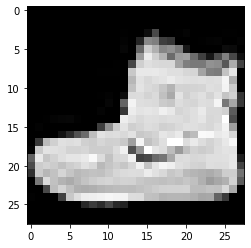

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0
# Plot image data from x_train
plt.imshow(x_train[0], cmap = "gray")
plt.show()
LATENT_SIZE = 32


In [ ]:
encoder = Sequential([
    Flatten(input_shape = (28, 28)),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(64),
    LR(),
    Dropout(0.5),
    Dense(LATENT_SIZE),
    LR()
])


In [ ]:
decoder = Sequential([
    Dense(64, input_shape = (LATENT_SIZE,)),
    LR(),
    Dropout(0.5),
    Dense(128),
    LR(),
    Dropout(0.5),
    Dense(256),
    LR(),
    Dropout(0.5),
    Dense(512),
    LR(),
    Dropout(0.5),
    Dense(784),
    Activation("sigmoid"),
    Reshape((28, 28))
])


In [ ]:
img = Input(shape = (28, 28))
latent_vector = encoder(img)
output = decoder(latent_vector)
model = Model(inputs = img, outputs = output)
model.compile("nadam", loss = "binary_crossentropy")

In [ ]:
rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))

In [ ]:
rand.shape

(4, 4, 1, 28, 28)

In [ ]:
rand[0, 0].shape

(1, 28, 28)

1/1 [==============================] - 0s 17ms/step


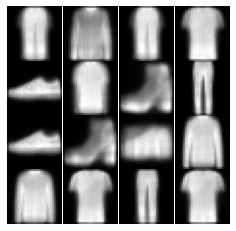

----------- EPOCH 49 -----------
235/235 [==============================] - 11s 49ms/step - loss: 0.0081


In [ ]:
EPOCHS = 50
history = []
#Only do plotting if you have IPython, Jupyter, or using Colab
for epoch in range(EPOCHS):
    fig, axs = plt.subplots(4, 4, figsize=(4,4))
    rand = x_test[np.random.randint(0, 10000, 16)].reshape((4, 4, 1, 28, 28))
    
    display.clear_output() # If you imported display from IPython
    
    for i in range(4):
        for j in range(4):
            axs[i, j].imshow(model.predict(rand[i, j])[0], cmap = "gray")
            axs[i, j].axis("off")
    
    plt.subplots_adjust(wspace = 0, hspace = 0)
    plt.show()
    print("-----------", "EPOCH", epoch, "-----------")
    history = model.fit(x_train, x_train, batch_size = 256, shuffle=True)

In [ ]:
history = model.fit(x_train, x_train,       
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

In [ ]:
encoded_imgs = encoder.predict(x_test) 
decoded_imgs = decoder.predict(encoded_imgs) 

313/313 [==============================] - 2s 5ms/step


In [ ]:
encoded_imgs.shape

(10000, 32)

In [ ]:
decoded_imgs.shape

(10000, 28, 28)

In [ ]:
range(10, 20)

range(10, 20)

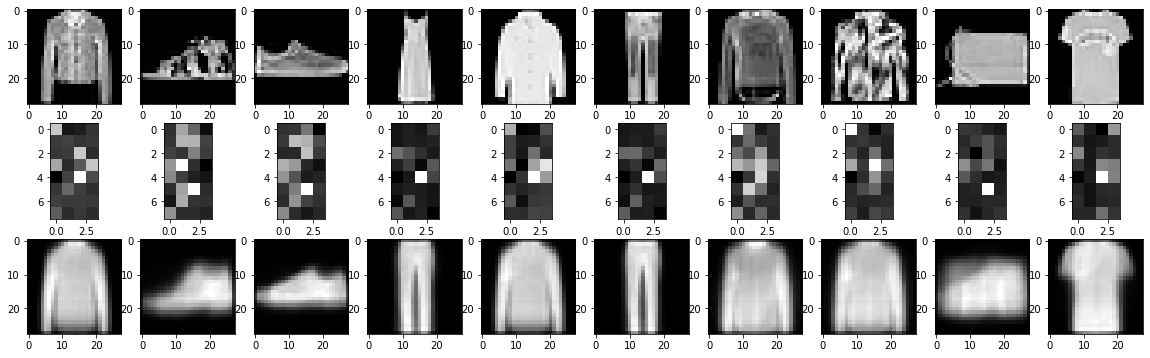

In [ ]:
plt.figure(figsize=(20, 6))
for i in range(10, 20):
        # display original
        plt.subplot(3, 10, i-10 + 1)
        plt.imshow(x_test[i],cmap='gray')

        # display latent space
        plt.subplot(3, 10, i-10 + 11)
        plt.imshow(encoded_imgs[i].reshape(8,4),cmap='gray')
        
        # display reconstruction
        plt.subplot(3, 10, i-10 + 21)
        plt.imshow(decoded_imgs[i],cmap='gray')
plt.show()     

In [ ]:
n_components = [10] 
models_gmm  = [GMM(n) for n in n_components]
aics  = [model.fit(encoded_imgs).aic(encoded_imgs) for model in models_gmm]

In [ ]:
print(aics)
gmm_NN = models_gmm[0]
y_gmm_NN = gmm_NN.predict(encoded_imgs)
print(accuracy_score(y_test_modified,y_gmm_NN))
print(rand_score(y_test_modified,y_gmm_NN))

[-2917458.3469309425]
0.1058
0.8693002500250026


In [ ]:
# my_model directory
!ls saved_model

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_model/my_model

ls: cannot access 'saved_model': No such file or directory
ls: cannot access 'saved_model/my_model': No such file or directory


In [ ]:
!ls sample_data

anscombe.json		      mnist_test.csv	     README.md
california_housing_test.csv   mnist_train_small.csv
california_housing_train.csv  my_model


In [ ]:
model.save('sample_data/my_model') 

In [ ]:
#loaded_model = tf.keras.models.load_model("model.keras")

In [ ]:
X_train = x_train.reshape((60000, 28, 28, 1))

In [ ]:
input_shape = (28, 28, 1)
encoder = Sequential([
     keras.Input(shape=input_shape),
        Conv2D(32, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
],name="encoder")

decoder = Sequential([
    Conv2DTranspose(32, (5, 5), strides=1, activation="relu", padding="same"),
    Dense(625, activation="relu"), # 225 # input_shape=[256]
    Dense(28 * 28, activation="sigmoid"),           # output values should be between 0 and 1
    Reshape([28, 28])
],name="decoder")

# # the autoencoder combines the two 
# autoencoder = Sequential([encoder, decoder])

In [ ]:
# Autoencoder First Version

# Reading Data


In [7]:
# load fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

4422102/4422102 [==============================] - 0s 0us/step


In [8]:
np.unique(y_test)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [9]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

# Separation of 3 labels set for Training/Test set

In [18]:
x_train_3, y_train_3, x_test_3, y_test_3  = data_3_labels(9, 8, 5, x_train, y_train, x_test, y_test)

In [19]:
x_train_3.shape

(18000, 28, 28)

In [12]:
y_train_3.shape

(18000,)

In [13]:
x_test_3.shape

(3000, 28, 28)

In [ ]:
y_test_3.shape

In [16]:
y_test_3_t = y_test_3.copy()
y_train_3_t = y_train_3.copy()
y_test_3_r = y_test_3.copy()
y_train_3_r = y_train_3.copy()

In [ ]:
np.unique(y_test_3_t)

In [18]:
np.unique(y_test_3)

array([5, 8, 9], dtype=uint8)

In [19]:
np.unique(y_train_3)

array([5, 8, 9], dtype=uint8)

In [20]:
np.unique(y_train_3_t)

array([5, 8, 9], dtype=uint8)

# Split Training/Validation set

In [15]:
x_train_1, x_validation_1, y_train_1, y_validation_1 = split(x_train, y_train, size=0.1667)

In [16]:
x_train_1.shape

(49998, 28, 28)

In [17]:
x_validation_1.shape

(10002, 28, 28)

In [20]:
x_train_3_1, x_validation_3_1, y_train_3_1, y_validation_3 = split(x_train_3, y_train_3, size=0.1667)

In [ ]:
np.unique(y_train_3_1)

In [26]:
np.unique(y_validation_3)

array([5, 8, 9], dtype=uint8)

In [27]:
y_train_3_1.shape

(14999,)

In [28]:
x_train_3_1.shape

(14999, 28, 28)

In [29]:
y_train_3_1.shape

(14999,)

In [30]:
x_validation_3_1.shape

(3001, 28, 28)

In [31]:
y_validation_3.shape

(3001,)

In [35]:
np.unique(y_validation_3)

array([5, 8, 9], dtype=uint8)

In [34]:
np.unique(y_train_3_1)

array([5, 8, 9], dtype=uint8)

In [33]:
np.unique(y_test_3_t)

array([5, 8, 9], dtype=uint8)

In [32]:
x_train_3.shape

(18000, 28, 28)

## Normalized


In [12]:
# x_train_3 = np.reshape(x_train_3, (x_train_3.shape[0],784))
# x_train_3_1 = np.reshape(x_train_3_1, (x_train_3_1.shape[0],784))
# x_validation_3_1 = np.reshape(x_validation_3_1, (x_validation_3_1.shape[0],784))
# x_test_3 = np.reshape(x_test_3, (x_test_3.shape[0],784))
x_train_3 = x_train_3/255.
x_train_3_1 = x_train_3_1/255.
x_validation_3_1 = x_validation_3_1/255.
x_test_3 = x_test_3/255.

# Autoencoder First Version


## Encoder First Version

In [132]:
encoder_1 = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(676, activation="relu"),     
    Dense(256, activation="relu"),
],name="encoder")

decoder_1 = Sequential([
    Dense(676, activation="relu", input_shape=[256]),
    Dense(28 * 28, activation="sigmoid"),           # output values should be between 0 and 1
    Reshape([28, 28])
],name="decoder")

autoencoder_1 = Sequential([encoder_1, decoder_1])

In [450]:
encoder_1 = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(676, activation="relu"),     
    Dense(324, activation="relu"),
],name="encoder")

decoder_1 = Sequential([
    Dense(676, activation="relu", input_shape=[324]),
    Dense(28 * 28, activation="sigmoid"),           # output values should be between 0 and 1
    Reshape([28, 28])
],name="decoder")

autoencoder_1 = Sequential([encoder_1, decoder_1])

In [367]:
encoder_1 = Sequential([
    Flatten(input_shape=[28, 28]),
    Dense(625, activation="relu"),     
    Dense(225, activation="relu"),
],name="encoder")

decoder_1 = Sequential([
    Dense(625, activation="relu", input_shape=[225]),
    Dense(28 * 28, activation="sigmoid"),           # output values should be between 0 and 1
    Reshape([28, 28])
],name="decoder")

autoencoder_1 = Sequential([encoder_1, decoder_1])

In [451]:
autoencoder_1.compile(optimizer='adam', loss='binary_crossentropy')

In [452]:
history = autoencoder_1.fit(x_train_3_1, x_train_3_1,       
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_validation_3_1, x_validation_3_1))

Epoch 1/10
59/59 [==============================] - 5s 67ms/step - loss: 0.3911 - val_loss: 0.3192
Epoch 2/10
59/59 [==============================] - 4s 64ms/step - loss: 0.3015 - val_loss: 0.2930
Epoch 3/10
59/59 [==============================] - 5s 86ms/step - loss: 0.2867 - val_loss: 0.2830
Epoch 4/10
59/59 [==============================] - 4s 64ms/step - loss: 0.2780 - val_loss: 0.2755
Epoch 5/10
59/59 [==============================] - 4s 67ms/step - loss: 0.2716 - val_loss: 0.2707
Epoch 6/10
59/59 [==============================] - 4s 66ms/step - loss: 0.2673 - val_loss: 0.2674
Epoch 7/10
59/59 [==============================] - 4s 63ms/step - loss: 0.2658 - val_loss: 0.2653
Epoch 8/10
59/59 [==============================] - 4s 64ms/step - loss: 0.2609 - val_loss: 0.2619
Epoch 9/10
59/59 [==============================] - 4s 64ms/step - loss: 0.2607 - val_loss: 0.2605
Epoch 10/10
59/59 [==============================] - 4s 63ms/step - loss: 0.2567 - val_loss: 0.2583


## Encoding/Decoding Images from Model


In [453]:
encoded_1_imgs_3 = encoder_1.predict(x_train_3) 
decoded_1_imgs_3 = decoder_1.predict(encoded_1_imgs_3) 

563/563 [==============================] - 2s 4ms/step


In [454]:
encoded_1_imgs_3.shape

(18000, 324)

In [455]:
decoded_1_imgs_3.shape

(18000, 28, 28)

In [333]:
np.random.randint(0, 1800/2., 10)

array([337,  63, 212, 221,   1, 498, 700, 534, 517,  20])

###  Plot encoded and decoded images

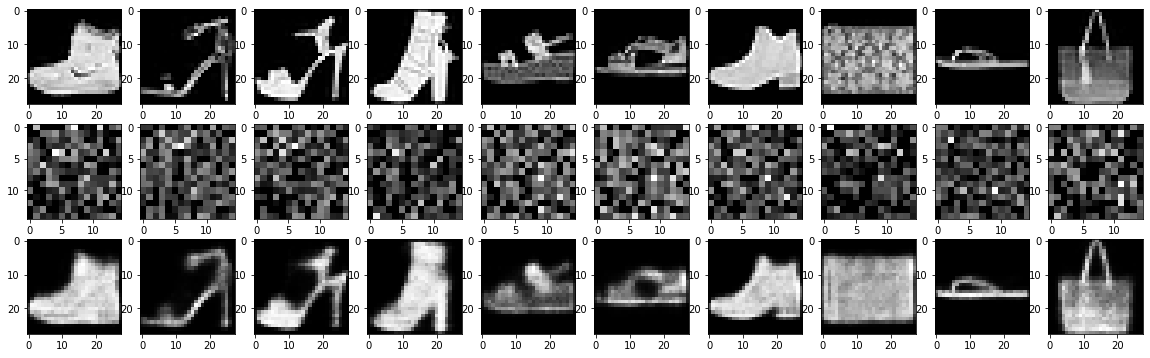

In [373]:
plt.figure(figsize=(20, 6))
for i in range(10):
  index = i
  # display original
  plt.subplot(3, 10, i + 1)
  plt.imshow(x_train_3[index],cmap='gray')

  # display latent space
  plt.subplot(3, 10, i + 11)
  plt.imshow(encoded_1_imgs_3[index].reshape(15,15),cmap='gray')
        
  # display reconstruction
  plt.subplot(3, 10, i + 21)
  plt.imshow(decoded_1_imgs_3[index],cmap='gray')
plt.show() 

[565 249 450 467 815 412 887  18 408 864]


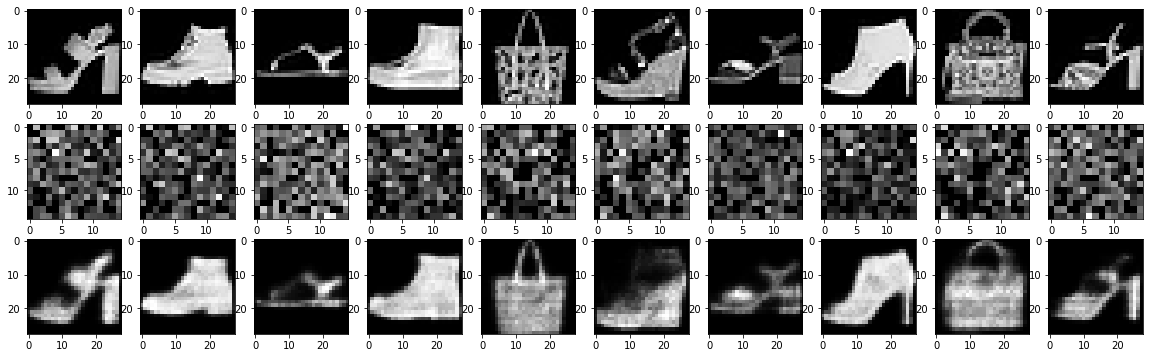

In [374]:
plt.figure(figsize=(20, 6))
arr = np.random.randint(0, 1800/2., 10)
print(arr)
for i in range(10):
  index = arr[i]
  # display original
  plt.subplot(3, 10, i + 1)
  plt.imshow(x_train_3[index],cmap='gray')

  # display latent space
  plt.subplot(3, 10, i + 11)
  plt.imshow(encoded_1_imgs_3[index].reshape(15,15),cmap='gray')
        
  # display reconstruction
  plt.subplot(3, 10, i + 21)
  plt.imshow(decoded_1_imgs_3[index],cmap='gray')
plt.show() 
    

## Model Prediction

In [375]:
n_components = [3] 
models_gmm  = [GMM(n) for n in n_components]
fits  = [model.fit(encoded_1_imgs_3) for model in models_gmm]
# aics  = [model.fit(encoded_1_imgs_3).aic(encoded_1_imgs_3) for model in models_gmm]

In [444]:
n_components = [3] 
models_gmm  = [GMM(n) for n in n_components]
# aics  = [model.fit(encoded_1_imgs_3).aic(encoded_1_imgs_3) for model in models_gmm]

In [457]:
n_components = [3] 
models_gmm_324  = [GMM(n) for n in n_components]
# aics  = [model.fit(encoded_1_imgs_3).aic(encoded_1_imgs_3) for model in models_gmm_324]

In [458]:
print(aics)

[-15129278.398657396]


In [315]:
print(aics)

[-12337634.776543159]


In [377]:
gmm_1 = models_gmm[0]

## Test Accuracy

In [ ]:
y_train_3_t = y_train_3.copy()
y_test_3_t = y_test_3.copy()

In [449]:
def get_accuracy(y_train_3_t, y_train_3, y_train_gmm_1, y_test_3_t, y_test_3, y_test_gmm_1):
  comb = permutations([0, 1, 2], 3)
  acc_train_max = 0
  acc_test_max = 0
  index = 0
  for i in comb:
      print(i)
      y_train_3_t[y_train_3 == 9] = i[0]
      y_train_3_t[y_train_3 == 8] = i[1]
      y_train_3_t[y_train_3 == 5] = i[2]
      acc_train = accuracy_score(y_train_gmm_1, y_train_3_t)
      print("Train Accuarcy: %f " % acc_train) # Train accuracy
      if(acc_train_max < acc_train):
        acc_train_max = acc_train
      y_test_3_t[y_test_3 == 9] = i[0]
      y_test_3_t[y_test_3 == 8] = i[1]
      y_test_3_t[y_test_3 == 5] = i[2]
      acc_test = accuracy_score(y_test_gmm_1, y_test_3_t)
      if(acc_test_max < acc_test):
        acc_test_max = acc_test
        index = i
      print("Test accuracy : %f" % acc_test) # Test accuracy 
  return acc_train_max, acc_test_max, index  

In [447]:
gmm_256 = models_gmm[0]
y_train_gmm_256 = gmm_256.predict(encoded_1_imgs_3)
encoded_1_imgs_test_3 = encoder_1.predict(x_test_3) 
decoded_1_imgs_test_3 = decoder_1.predict(encoded_1_imgs_test_3) 
y_test_gmm_256 = gmm_256.predict(encoded_1_imgs_test_3)

94/94 [==============================] - 0s 4ms/step


In [448]:
get_accuracy(y_train_3_t, y_train_3, y_train_gmm_256, y_test_3_t, y_test_3, y_test_gmm_256) # 256

(0, 1, 2)
Train Accuarcy: 0.326056 
Test accuracy : 0.326667
(0, 2, 1)
Train Accuarcy: 0.823444 
Test accuracy : 0.813000
(1, 0, 2)
Train Accuarcy: 0.033778 
Test accuracy : 0.030000
(1, 2, 0)
Train Accuarcy: 0.458222 
Test accuracy : 0.473667
(2, 0, 1)
Train Accuarcy: 0.215722 
Test accuracy : 0.199667
(2, 1, 0)
Train Accuarcy: 0.142778 
Test accuracy : 0.157000


(0.8234444444444444, 0.813, (0, 2, 1))

In [459]:
gmm_324 = models_gmm_324[0]
y_train_gmm_324 = gmm_324.predict(encoded_1_imgs_3)
encoded_1_imgs_test_3 = encoder_1.predict(x_test_3) 
decoded_1_imgs_test_3 = decoder_1.predict(encoded_1_imgs_test_3) 
y_test_gmm_324 = gmm_324.predict(encoded_1_imgs_test_3)

94/94 [==============================] - 0s 4ms/step


In [460]:
get_accuracy(y_train_3_t, y_train_3, y_train_gmm_324, y_test_3_t, y_test_3, y_test_gmm_324) # 324

(0, 1, 2)
Train Accuarcy: 0.354222 
Test accuracy : 0.354333
(0, 2, 1)
Train Accuarcy: 0.836889 
Test accuracy : 0.828667
(1, 0, 2)
Train Accuarcy: 0.019333 
Test accuracy : 0.017000
(1, 2, 0)
Train Accuarcy: 0.416667 
Test accuracy : 0.427667
(2, 0, 1)
Train Accuarcy: 0.229111 
Test accuracy : 0.218000
(2, 1, 0)
Train Accuarcy: 0.143778 
Test accuracy : 0.154333


(0.8368888888888889, 0.8286666666666667, (0, 2, 1))

In [398]:
y_train_gmm_1 = gmm_1.predict(encoded_1_imgs_3)

In [399]:
y_train_gmm_1[0:10]

array([0, 2, 2, 1, 2, 2, 0, 0, 2, 1])

In [400]:
y_train_3[0:10]

array([9, 5, 5, 9, 5, 5, 9, 8, 5, 8], dtype=uint8)

In [340]:
encoded_1_imgs_3.shape

(18000, 225)

In [341]:
np.unique(y_train_3)

array([0, 1, 2], dtype=uint8)

In [342]:
np.unique(y_train_gmm_1)

array([0, 1, 2])

In [381]:
rand_score(y_train_gmm_1,y_train_3)

0.7548702150119451

In [414]:
y_train_3_t = y_train_3.copy()
# y_train_3_t[y_train_3 == 9] = 0
# y_train_3_t[y_train_3 == 8] = 1
# y_train_3_t[y_train_3 == 5] = 2

In [404]:
from itertools import permutations

In [415]:
comb = permutations([0, 1, 2], 3)
  
for i in comb:
    print(i)
    y_train_3_t[y_train_3 == 9] = i[0]
    y_train_3_t[y_train_3 == 8] = i[1]
    y_train_3_t[y_train_3 == 5] = i[2]
    print(accuracy_score(y_train_gmm_1, y_train_3_t)  ) # Train accuracy

(0, 1, 2)
0.7594444444444445
(0, 2, 1)
0.2936666666666667
(1, 0, 2)
0.4662222222222222
(1, 2, 0)
0.09366666666666666
(2, 0, 1)
0.1468888888888889
(2, 1, 0)
0.2401111111111111


In [408]:
comb = np.array(comb)

In [410]:
comb.shape

()

In [402]:
y_train_3_t = y_train_3.copy()
y_train_3_t[y_train_3 == 9] = 0
y_train_3_t[y_train_3 == 8] = 1
y_train_3_t[y_train_3 == 5] = 2

In [403]:
accuracy_score(y_train_gmm_1, y_train_3_t) # Train accuracy 

0.7594444444444445

In [394]:
y_test_3_t = y_test_3.copy()
y_test_3_t[y_test_3_t == 9] = 0
y_test_3_t[y_test_3_t == 8] = 1
y_test_3_t[y_test_3_t == 5] = 2

In [386]:
encoded_1_imgs_test_3 = encoder_1.predict(x_test_3) 
decoded_1_imgs_test_3 = decoder_1.predict(encoded_1_imgs_test_3) 

94/94 [==============================] - 0s 4ms/step


In [388]:
x_test_3.shape

(3000, 28, 28)

In [421]:
y_test_gmm_1 = gmm_1.predict(encoded_1_imgs_test_3)

In [423]:
np.unique(y_test_3)

array([5, 8, 9], dtype=uint8)

In [67]:
def get_accuracy(y_train_3_t, y_train_3, y_train_gmm_1, y_test_3_t, y_test_3, y_test_gmm_1):
  comb = permutations([0, 1, 2], 3)
  acc_train_max = 0
  acc_test_max = 0
  index = 0
  for i in comb:
      print(i)
      y_train_3_t[y_train_3 == 9] = i[0]
      y_train_3_t[y_train_3 == 8] = i[1]
      y_train_3_t[y_train_3 == 5] = i[2]
      acc_train = accuracy_score(y_train_gmm_1, y_train_3_t)
      print("Train accuracy: %f " % acc_train) # Train accuracy
      if(acc_train_max < acc_train):
        acc_train_max = acc_train
      y_test_3_t[y_test_3 == 9] = i[0]
      y_test_3_t[y_test_3 == 8] = i[1]
      y_test_3_t[y_test_3 == 5] = i[2]
      acc_test = accuracy_score(y_test_gmm_1, y_test_3_t)
      if(acc_test_max < acc_test):
        acc_test_max = acc_test
        index = i
      print("Test accuracy : %f" % acc_test) # Test accuracy 
  return acc_train_max, acc_test_max, index  

In [437]:
def get_accuracy_test(y_test_3_t, y_test_3, y_test_gmm_1):
  comb = permutations([0, 1, 2], 3)
  acc_train_max = 0
  acc_test_max = 0
  index = 0
  for i in comb:
      print(i)
      y_test_3_t[y_test_3 == 9] = i[0]
      y_test_3_t[y_test_3 == 8] = i[1]
      y_test_3_t[y_test_3 == 5] = i[2]
      acc_test = accuracy_score(y_test_gmm_1, y_test_3_t)
      if(acc_test_max < acc_test):
        acc_test_max = acc_test
        index = i
      print("Test accuracy : %f" % acc_test) # Test accuracy 
  return acc_train_max, acc_test_max, index  

In [436]:
get_accuracy(y_train_3_t, y_train_3, y_train_gmm_1, y_test_3_t, y_test_3, y_test_gmm_1) # 225

(0, 1, 2)
Train Accuarcy: 0.759444 
Test accuracy : 0.771667
(0, 2, 1)
Train Accuarcy: 0.293667 
Test accuracy : 0.291333
(1, 0, 2)
Train Accuarcy: 0.466222 
Test accuracy : 0.465000
(1, 2, 0)
Train Accuarcy: 0.093667 
Test accuracy : 0.091333
(2, 0, 1)
Train Accuarcy: 0.146889 
Test accuracy : 0.137000
(2, 1, 0)
Train Accuarcy: 0.240111 
Test accuracy : 0.243667


(0.7594444444444445, 0.7716666666666666, (0, 1, 2))

In [389]:
np.unique(y_test_gmm_1)

array([0, 1, 2])

In [395]:
accuracy_score(y_test_gmm_1, y_test_3_t) # Test accuracy 

0.7716666666666666

In [393]:
accuracy_score(y_test_gmm_1, y_test_3_t) # Test accuracy 

0.465

In [202]:
y_test_proba_gmm_1 = gmm_1.predict_proba(encoded_1_imgs_test_3)

In [173]:
y_test_proba_gmm_1.shape

(3000, 10)

In [174]:
y_test_proba_gmm_1[0]

array([0.00000000e+000, 1.00000000e+000, 0.00000000e+000, 0.00000000e+000,
       1.31816446e-051, 0.00000000e+000, 0.00000000e+000, 1.03073875e-179,
       0.00000000e+000, 0.00000000e+000])

In [ ]:
# CNN

# CNN 

In [2]:
from keras.layers import *
from keras.models import Model, load_model
from keras.datasets import mnist
from keras.callbacks import ReduceLROnPlateau
from keras import regularizers
from keras import optimizers
from keras import backend as K
import scipy
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox, TextArea
import pandas as pd
import numpy as np

In [21]:
print(x_train.shape)
print(y_train.shape)
print(x_train_3_1.shape)
print(x_validation_3_1.shape)
print(y_train_3_1.shape)
print(y_train_3.shape)

(60000, 28, 28)
(60000,)
(14999, 28, 28)
(3001, 28, 28)
(14999,)
(18000,)


In [121]:
x_train_3_1_cnn = x_train_3_1.reshape(-1, 28, 28, 1)
x_validation_3_1_cnn = x_validation_3_1.reshape(-1, 28, 28, 1)
print(x_train_3_1.shape)
print(x_validation_3_1.shape)
print(x_train_3_1_cnn.shape)
print(x_validation_3_1_cnn.shape)
x_train_3_1_cnn = x_train_3_1_cnn/255.
x_validation_3_1_cnn = x_validation_3_1_cnn/255.
x_test_3_cnn = x_test_3.reshape(-1, 28, 28, 1)
x_test_3_cnn = x_test_3_cnn/255.
print(x_test_3.shape)
print(x_test_3_cnn.shape)

(14999, 28, 28)
(3001, 28, 28)
(14999, 28, 28, 1)
(3001, 28, 28, 1)
(3000, 28, 28)
(3000, 28, 28, 1)


In [61]:
x_test_3_cnn = x_test_3.copy()
x_test_3_cnn = x_test_3_cnn.reshape(-1, 28, 28, 1)
x_test_3_cnn = x_test_3_cnn/255.

## Data for CNN on Train and Validation set

In [56]:
x_train_1_cnn = x_train_1.copy()
x_validation_1_cnn = x_validation_1.copy()
x_test_1_cnn = x_test.copy()
#
x_test_1_cnn = x_test_1_cnn.reshape(-1, 28, 28, 1)
x_train_1_cnn = x_train_1_cnn.reshape(-1, 28, 28, 1)
x_validation_1_cnn = x_validation_1_cnn.reshape(-1, 28, 28, 1)
x_validation_1_cnn = x_validation_1_cnn.reshape(-1, 28, 28, 1)
#
print(x_test.shape)
print(x_train_1.shape)
print(x_validation_1.shape)
print([np.max(x_train_1), np.min(x_train_1)])
print([np.max(x_validation_1), np.min(x_validation_1)])
print([np.max(x_test), np.min(x_test)])
#
x_test_1_cnn = x_test_1_cnn/255.
x_train_1_cnn = x_train_1_cnn/255.
x_validation_1_cnn = x_validation_1_cnn/255.
print(x_test_1_cnn.shape)
print(x_train_1_cnn.shape)
print(x_validation_1_cnn.shape)
print([np.max(x_train_1_cnn), np.min(x_train_1_cnn)])
print([np.max(x_validation_1_cnn), np.min(x_validation_1_cnn)])
print([np.max(x_test_1_cnn), np.min(x_test_1_cnn)])

(10000, 28, 28)
(49998, 28, 28)
(10002, 28, 28)
[255, 0]
[255, 0]
[255, 0]
(10000, 28, 28, 1)
(49998, 28, 28, 1)
(10002, 28, 28, 1)
[1.0, 0.0]
[1.0, 0.0]
[1.0, 0.0]


In [43]:
x_train_cnn = x_train.copy()
x_test_cnn = x_test.copy()
x_train_cnn = x_train_cnn.reshape(-1, 28, 28, 1)
x_test_cnn = x_test_cnn.reshape(-1, 28, 28, 1)
print(x_test.shape)
print(x_train.shape)
print([np.max(x_train), np.min(x_train)])
print([np.max(x_test), np.min(x_test)])

(10000, 28, 28)
(60000, 28, 28)
[255, 0]
[255, 0]


In [44]:
x_test_cnn = x_test_cnn/255.
x_train_cnn = x_train_cnn/255.
print(x_test_cnn.shape)
print(x_train_cnn.shape)
print([np.max(x_train_cnn), np.min(x_train_cnn)])
print([np.max(x_test_cnn), np.min(x_test_cnn)])

(10000, 28, 28, 1)
(60000, 28, 28, 1)
[1.0, 0.0]
[1.0, 0.0]


In [39]:
def make_and_fit_v1(x_train_data, x_validation_data, epochs=5):
    inputs = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
    x = Flatten()(x)
    encoded = Dense(2, activation='relu')(x)

    encoder = Model(inputs=inputs, outputs=encoded)
    print(encoder.summary())
    
    encoded_inputs = Input(shape=(2,))

    x = Dense(4, activation='relu')(encoded_inputs)
    x = Reshape((2, 2, 1))(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((7, 7))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

    decoder = Model(inputs=encoded_inputs, outputs=decoded)
    print(decoder.summary())
    
    x = encoder(inputs)
    x = decoder(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy', 'mse'])

    print(model.summary())
    
    clr = ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,
        patience=3,
        min_delta=0.01,
        cooldown=0,
        min_lr=1e-7,
        verbose=1)

    history = model.fit(
        x_train_data,
        x_train_data,
        batch_size=256,
        epochs=epochs,
        shuffle=True,
        validation_data=(x_validation_data, x_validation_data),
        callbacks=[clr])

    return model, encoder, decoder, history

In [113]:
def make_and_fit_v3(x_train_data, x_validation_data, epochs=5):
    inputs = Input(shape=(28, 28, 1))

    x = Conv2D(32, (3, 3), activation='relu', padding='same')(inputs)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2))(x)
    x = BatchNormalization()(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(1, (2, 2), activation='relu', padding='same')(x)
    print('#1')
    x = Flatten()(x)
    encoded = Dense(324, activation='relu')(x)
    print(encoded) 

    encoder = Model(inputs=inputs, outputs=encoded)
    print('#2')
    print(encoder.summary())
    
    encoded_inputs = Input(shape=(324,))

    x = Dense(324, activation='relu')(encoded_inputs)
    x = Reshape((18, 18, 1))(x)
    x = Conv2D(4, (2, 2), activation='relu', padding='same')(x)
    x = Conv2D(16, (2, 2), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((7, 7))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)
    print('#3')
    print(decoded) 
    print('#4')
    decoder = Model(inputs=encoded_inputs, outputs=decoded)
    print(decoder.summary())
    
    x = encoder(inputs)
    x = decoder(x)
    model = Model(inputs=inputs, outputs=x)
    model.compile(optimizer=optimizers.Adam(1e-3), loss='binary_crossentropy', metrics=['accuracy', 'mse'])
    print('#5')
    print(model.summary())
    
    clr = ReduceLROnPlateau(
        monitor='loss',
        factor=0.5,
        patience=3,
        min_delta=0.01,
        cooldown=0,
        min_lr=1e-7,
        verbose=1)

    history = model.fit(
        x_train_data,
        x_train_data,
        batch_size=256,
        epochs=epochs,
        shuffle=True,
        validation_data=(x_validation_data, x_validation_data),
        callbacks=[clr])

    return model, encoder, decoder, history

In [103]:
def make_and_fit_v2(x_train_data, x_validation_data, epochs, encoded_layer_size):  
    input = Input(shape=(28, 28, 1))
    
    # Encoder
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(input)
    x = MaxPooling2D((2, 2), padding="same")(x)
    x = Conv2D(32, (3, 3), activation="relu", padding="same")(x)
    x = MaxPooling2D((2, 2), padding="same")(x)
    print(x)
    flatten_layer = Flatten()(x)
    encoded = Dense(2, activation='relu')(flatten_layer)
    
    encoder = Model(inputs=input, outputs=encoded)
    print(encoder.summary())
    
    # Decoder
    x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = Conv2DTranspose(32, (3, 3), strides=2, activation="relu", padding="same")(x)
    x = Conv2D(1, (3, 3), activation="sigmoid", padding="same")(x)
    decoded = x
    decoder = Model(inputs=input, outputs=decoded)
    print(decoder.summary())

    # Autoencoder Model
    model = Model(input, x)
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy', 'mse'])
    print(model.summary())

    history = model.fit(
        x_train_data,
        x_train_data,
        batch_size=256,
        epochs=epochs,
        shuffle=True,
        validation_data=(x_validation_data, x_validation_data))

    return model, encoder, decoder, history

In [114]:
result_v3_e1_324 = make_and_fit_v3(x_train_1_cnn, x_validation_1_cnn, 1)

#1
KerasTensor(type_spec=TensorSpec(shape=(None, 324), dtype=tf.float32, name=None), name='dense_15/Relu:0', description="created by layer 'dense_15'")
#2
Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_68 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_69 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_12 (Bat  (None, 14, 14, 32)       128       
 chNormalization)                  

ValueError: ignored

In [104]:
result_e2_324 = make_and_fit_v2(x_train_1_cnn, x_validation_1_cnn, 2, 324)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 32), dtype=tf.float32, name=None), name='max_pooling2d_19/MaxPool:0', description="created by layer 'max_pooling2d_19'")
Model: "model_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_49 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)            

In [95]:
result_e1 = make_and_fit_v2(x_train_1_cnn, x_validation_1_cnn, 1)

KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 32), dtype=tf.float32, name=None), name='max_pooling2d_17/MaxPool:0', description="created by layer 'max_pooling2d_17'")
Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_46 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_47 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)            

In [87]:
result_e3 = make_and_fit_v2(x_train_1_cnn, x_validation_1_cnn, 3)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2D)          (None, 14, 14, 32)        9248      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1568)              0  

In [29]:
result_e4 = make_and_fit_v1(x_train_1_cnn, x_validation_1_cnn, 4)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 2)                 34889     
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         42417     
                                                                 
Total params: 77,306
Trainable params: 77,082
Non-trainable params: 224
_________________________________________________________________
None
Epoch 1/4
196/196 [==============================] - 497s 3s/step - loss: 0.4108 - accuracy: 0.4898 - mse: 0.0567 - val_loss: 1.2313 - val_accuracy: 0.5013 - val_mse: 0.1973 - lr: 0.0010
Epoch 2/4
196/196 [==============================] - 527s 3s/step - loss: 0.3607 - accuracy: 0.4949 - mse: 0.0404 - val_loss:

In [89]:
model_e3, encoder_e3, decoder_e3, history_e3 = result_e3

In [106]:
model_e2_324, encoder_e2_324, decoder_e2_324, history_e2_324 = result_e2_324

In [96]:
model_e1, encoder_e1, decoder_e1, history_e1 = result_e1

In [31]:
model_e4, encoder_e4, decoder_e4, history_e4 = result_e4

In [46]:
result_e4_test = make_and_fit_v1(x_train_cnn, x_test_cnn, 4)

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 conv2d_17 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_18 (Conv2D)          (None, 14, 14, 32)        9248

In [50]:
model_e4_test, encoder_e4_test, decoder_e4_test = result_e4_test

In [51]:
labeldict = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

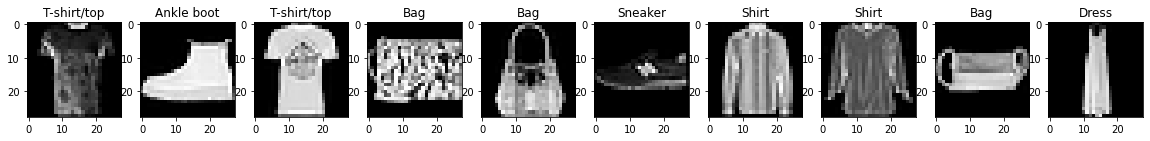

In [21]:
def plt_images_in_line(x, y):
  fig, ax = plt.subplots(1, 10, figsize=(20, 2))
  for i in range(10):
      ax[i].imshow(x[i], cmap='gray')
      ax[i].set_title(labeldict[y[i]])
plt_images_in_line(x_train_1, y_train_1)      

In [ ]:
def get_triple(inputs, encoder, decoder):
    latent_repr = encoder.predict(inputs)
    outputs = decoder.predict(latent_repr)
    latent_repr = latent_repr.reshape((latent_repr.shape[0], latent_repr.shape[1], 1))

    return inputs, latent_repr, outputs

def show_encodings(inputs, latent_repr, outputs):
    n = len(inputs)
    fig, axes = plt.subplots(2, n, figsize=(2*n, 5))
    for i in range(n):
        axes[1, i].set_title('({0:.2f}, {1:.2f})'.format(float(latent_repr[i, 0]), float(latent_repr[i, 1])))
        axes[0, i].imshow(inputs[i].reshape(28, 28), cmap='gray')
        axes[1, i].imshow(outputs[i].reshape(28, 28), cmap='gray')
    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
# show_encodings(*get_triple(x_test[:10], encoder_t1, decoder_t1))
# inputs = np.random.random(size=(10, 4, 4, 1))
# inputs = scipy.ndimage.zoom(inputs, (1, 7, 7, 1))
# show_encodings(*get_triple(inputs, encoder_t1, decoder_t1))

In [82]:
def plot_autoencoder_all(mode, x_cnn_shapped, y_labels_data, encoder_model, title):
    inputs = x_cnn_shapped
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title(title)
    coords = encoder_model.predict(inputs)
    print(coords.shape)
    if mode == 'imgs':
        for image, (x, y) in zip(inputs, coords):
            im = OffsetImage(image.reshape(28, 28), zoom=1, cmap='gray')
            ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        ax.update_datalim(coords)
        ax.autoscale()
    elif mode == 'dots':
        classes = y_labels_data
        plt.scatter(coords[:, 0], coords[:, 1], c=classes, cmap='RdYlBu')
        plt.colorbar()
        for i in range(10):
            class_center = np.mean(coords[classes == i], axis=0)
            text = TextArea('{} ({})'.format(labeldict[i], i))
            ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
            ax.add_artist(ab)
    plt.show()

In [93]:
coords = encoder_e3.predict(x_test_cnn)
coords.shape

313/313 [==============================] - 5s 16ms/step


(10000, 2)

In [94]:
coords.shape

(10000, 2)

313/313 [==============================] - 5s 17ms/step
(10000, 2)


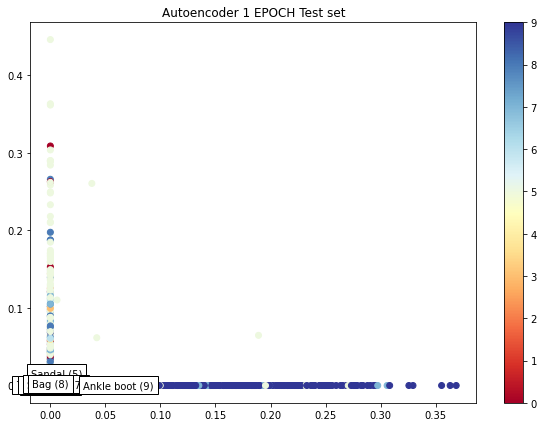

In [97]:
plot_autoencoder_all('dots', x_test_cnn, y_test, encoder_e1, 'Autoencoder 1 EPOCH Test set') 

313/313 [==============================] - 3s 10ms/step
(10000, 2)


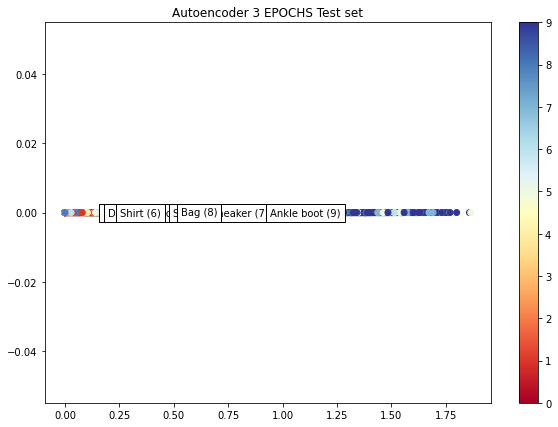

In [90]:
plot_autoencoder_all('dots', x_test_cnn, y_test, encoder_e3, 'Autoencoder 3 EPOCHS Test set') 

94/94 [==============================] - 1s 14ms/step
(3000, 2)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


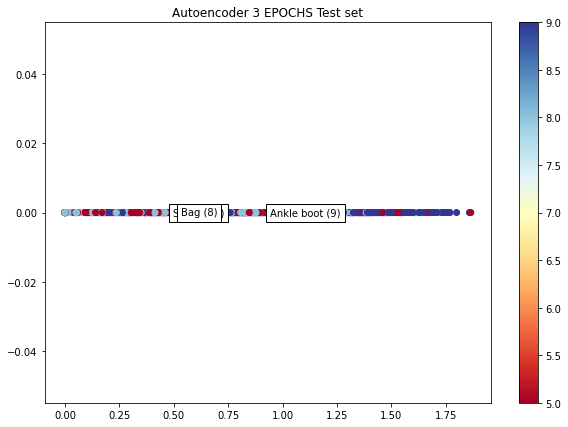

In [91]:
plot_autoencoder_all('dots', x_test_3_cnn, y_test_3, encoder_e3, 'Autoencoder 3 EPOCHS Test set') 

313/313 [==============================] - 10s 31ms/step
(10000, 2)


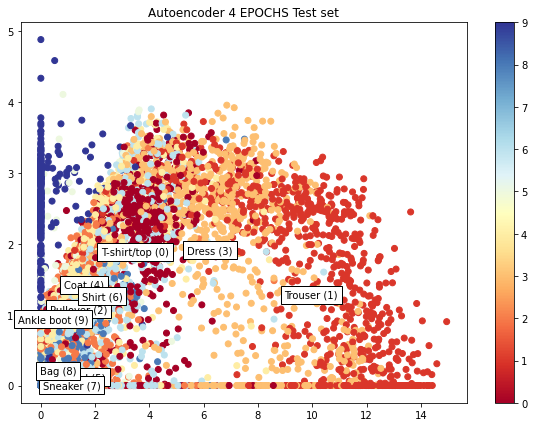

In [72]:
plot_autoencoder_all('dots', x_test_cnn, y_test, encoder_e4_test, 'Autoencoder 4 EPOCHS Test set') # 4

94/94 [==============================] - 7s 68ms/step
(3000, 2)


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


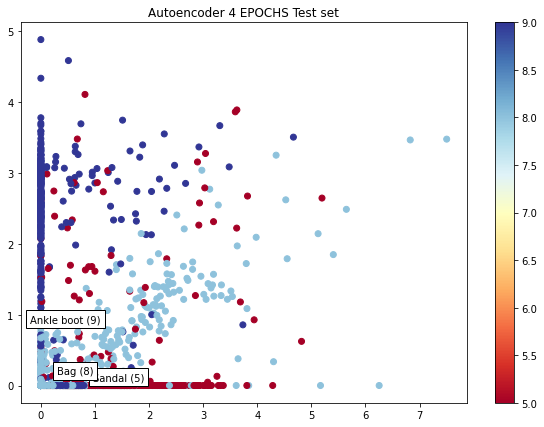

In [99]:
plot_autoencoder_all('dots', x_test_3_cnn, y_test_3, encoder_e4_test, 'Autoencoder 4 EPOCHS Test set') # 4

94/94 [==============================] - 4s 44ms/step


/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:181: RuntimeWarning: invalid value encountered in true_divide
  ret = um.true_divide(


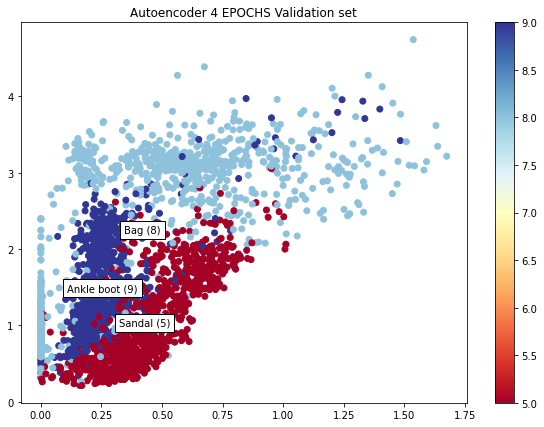

In [63]:
plot_autoencoder_all('dots', x_test_3_cnn, y_test_3, encoder_e4, 'Autoencoder 4 EPOCHS Validation set') # 4

313/313 [==============================] - 10s 30ms/step


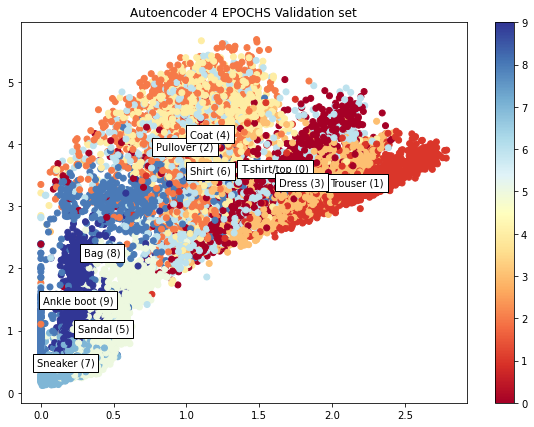

In [57]:
plot_autoencoder_all('dots', x_test_1_cnn, y_test, encoder_e4, 'Autoencoder 4 EPOCHS Validation set') # 4

In [65]:
def plot_latent_all(mode, count, technique, x_test, y_test, encoder):
    # idx = np.random.choice(len(x_test), count)
    inputs = x_test
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.set_title(technique)
    if technique == 'autoencoder':
        coords = encoder.predict(inputs)
    elif technique == 'pca':
        coords = PCA(n_components=2).fit_transform(inputs.reshape(count, -1))

    if mode == 'imgs':
        for image, (x, y) in zip(inputs, coords):
            im = OffsetImage(image.reshape(28, 28), zoom=1, cmap='gray')
            ab = AnnotationBbox(im, (x, y), xycoords='data', frameon=False)
            ax.add_artist(ab)
        ax.update_datalim(coords)
        ax.autoscale()
    elif mode == 'dots':
        classes = y_test
        plt.scatter(coords[:, 0], coords[:, 1], c=classes)
        plt.colorbar()
        for i in range(10):
            class_center = np.mean(coords[classes == i], axis=0)
            text = TextArea('{} ({})'.format(labeldict[i], i))
            ab = AnnotationBbox(text, class_center, xycoords='data', frameon=True)
            ax.add_artist(ab)
    plt.show()

313/313 [==============================] - 13s 42ms/step


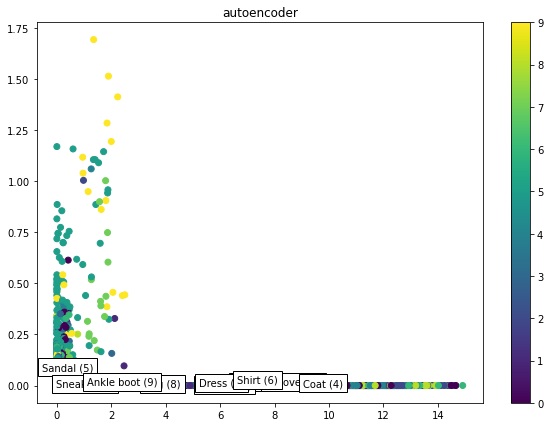

In [63]:
plot_latent_all('dots', 10000, 'autoencoder', x_test, y_test, encoder_t1)

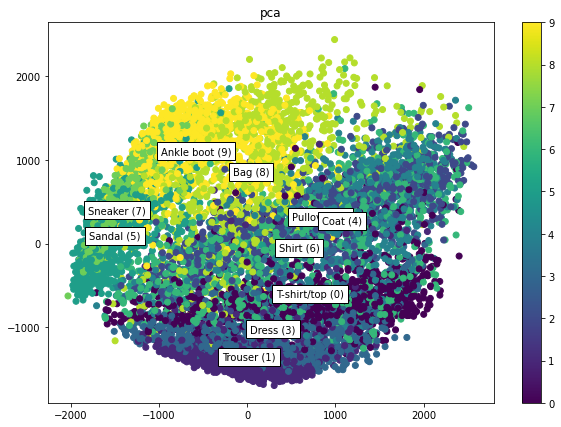

In [64]:
plot_latent_all('dots', 10000, 'pca', x_test, y_test, encoder_t1)

In [44]:
model, encoder, decoder = make_and_fit(x_train_3_1_cnn, x_validation_3_1_cnn, 30)

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 model (Functional)          (None, 2)                 34889     
                                                                 
 model_1 (Functional)        (None, 28, 28, 1)         42417     
                                                                 
Total params: 77,306
Trainable params: 77,082
Non-trainable params: 224
_________________________________________________________________
None
Epoch 1/30
59/59 [==============================] - 167s 3s/step - loss: -27310.1504 - accuracy: 0.0336 - mse: 12344.1055 - val_loss: -11105.2021 - val_accuracy: 0.0147 - val_mse: 12226.0488 - lr: 0.0010
Epoch 2/30
59/59 [==============================] - 170s 3s/step - loss: -1153491.0000 - accuracy: 0.0145 - 

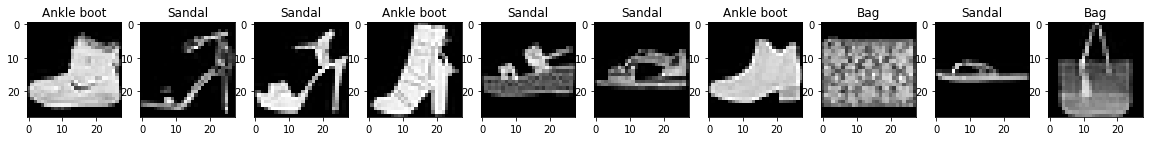

In [47]:
labeldict_3 = {
    5: 'Sandal',
    8: 'Bag',
    9: 'Ankle boot'
}

fig, ax = plt.subplots(1, 10, figsize=(20, 2))
for i in range(10):
    ax[i].imshow(x_train_3[i], cmap='gray')
    ax[i].set_title(labeldict_3[y_train_3[i]])

In [ ]:
def get_triple(inputs):
    latent_repr = encoder.predict(inputs)
    outputs = decoder.predict(latent_repr)
    latent_repr = latent_repr.reshape((latent_repr.shape[0], latent_repr.shape[1], 1))

    return inputs, latent_repr, outputs

def show_encodings(inputs, latent_repr, outputs):
    n = len(inputs)
    fig, axes = plt.subplots(2, n, figsize=(2*n, 5))
    for i in range(n):
        axes[1, i].set_title('({0:.2f}, {1:.2f})'.format(float(latent_repr[i, 0]), float(latent_repr[i, 1])))
        axes[0, i].imshow(inputs[i].reshape(28, 28), cmap='gray')
        axes[1, i].imshow(outputs[i].reshape(28, 28), cmap='gray')
    for ax in axes.flatten():
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    
show_encodings(*get_triple(x_test_3[:10]))
inputs = np.random.random(size=(10, 4, 4, 1))
inputs = scipy.ndimage.zoom(inputs, (1, 7, 7, 1))
show_encodings(*get_triple(inputs))

In [115]:
x_train_3_1.shape

(14999, 28, 28)

In [122]:
x_train_3_1_cnn.shape

(14999, 28, 28, 1)

In [123]:
x_validation_3_1_cnn.shape

(3001, 28, 28, 1)

In [131]:
input_layer = Input(shape=(28, 28, 1)) 
encoder_cnn_1 = Sequential([
    Conv2D(16, (3, 3), activation='relu', padding='same')(input_layer),
    MaxPooling2D((2, 2),padding='same'),
    Conv2D(8, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2), padding='same'),    
    Conv2D(8, (3, 3), activation='relu',padding='same'),
    MaxPooling2D((2, 2), padding='same')
],name="encoder")

decoder_cnn_1 = Sequential([
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),          
    Conv2D(8, (3, 3), activation='relu', padding='same'),
    UpSampling2D((2, 2)),
    Conv2D(16, (3, 3), activation='relu'),
    UpSampling2D((2, 2)),
    Conv2D(1, (3, 3), activation='sigmoid', padding='same')
],name="decoder")

autoencoder_cnn_1 = Sequential([encoder_cnn_1, decoder_cnn_1])

TypeError: ignored

In [ ]:
autoencoder_cnn_1.compile(optimizer='adam', loss='binary_crossentropy')

In [ ]:
history = autoencoder_cnn_1.fit(x_train_3_1_cnn, x_train_3_1_cnn,       
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_validation_3_1_cnn, x_validation_3_1_cnn))

## Encoded/Decoded Images

In [109]:
# encoded_x_train = encoder_e2_324.predict(x_train) 
# decoded_x_train = model_e2_324.predict(encoded_x_train) 
# encoded_x_test = encoder_e2_324.predict(x_test) 
# decoded_x_test = decoder_e2_324.predict(encoded_x_train) 

1875/1875 [==============================] - 20s 10ms/step


ValueError: ignored

In [ ]:
encoded_x_train.shape

## Test/Train Accuracy

In [ ]:
n_components = [10] 
models_gmm  = [GMM(n) for n in n_components]
fits  = [model.fit(encoded_x_test) for model in models_gmm]

# Previous Parts

In [150]:
gmm_1 = models_gmm[0]

In [152]:
y_gmm_NN = gmm_1.predict(encoded_1_imgs_3)

In [ ]:
y_gmm_NN_prob = gmm_NN.predict_proba(encoded_imgs)

In [ ]:
y_gmm_NN_prob.shape

(10000, 10)

In [ ]:
y_gmm_NN.shape

(10000,)

In [ ]:
y_gmm_NN[0]

5

In [ ]:
y_gmm_NN_prob[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [ ]:
adjusted_rand_score(y_test_modified,y_gmm_NN)

0.38268765793471926

In [ ]:
rand_score(y_test_modified,y_gmm_NN)

0.8793160516051605

In [ ]:
accuracy_score(y_test_modified,y_gmm_NN)

0.1

In [153]:
data_GMM_NN = gmm_1.sample(100)

In [155]:
decoded_imgs_GMM_NN = decoder_1.predict(data_GMM_NN[0])

4/4 [==============================] - 0s 6ms/step


In [156]:
def plot_decoded_img(decoded_imgs):
  for i in range(5):
    sample_plot = plt.subplot(2, 5, i + 1)
    sample_plot.imshow(decoded_imgs[i,:].reshape(28, 28), cmap='gray')
    sample_plot.set_xticks(())
    sample_plot.set_yticks(())

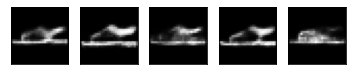

In [157]:
plot_decoded_img(decoded_imgs_GMM_NN)

In [ ]:
n_components = [10, 20, 30, 40, 60, 80, 100, 120, 140, 160, 180, 200] 
models_gmm  = [GMM(n) for n in n_components]
aics  = [model.fit(encoded_imgs).aic(encoded_imgs) for model in models_gmm]

[-6175683.01530347, -6337212.531731842, -6381817.205704088, -6813965.994204417, -7522546.222050529, -8619810.529288884, -9631687.791873205, -10055290.197633788, -9931135.25374832, -10120571.115524672, -9986801.129718374, -9563459.150286272]


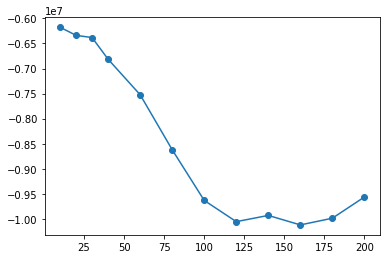

In [ ]:
plt.plot(n_components, aics)
plt.scatter(n_components, aics)
print(aics)

In [ ]:
n_components_t2 = [120, 125, 130, 135, 140] 
models_gmm_t2  = [GMM(n) for n in n_components_t2]
aics_t2  = [model.fit(encoded_imgs).aic(encoded_imgs) for model in models_gmm_t2]

[-10019419.811065659, -10145586.080229143, -10113560.795680426, -10105399.430797685, -10153157.373342283]


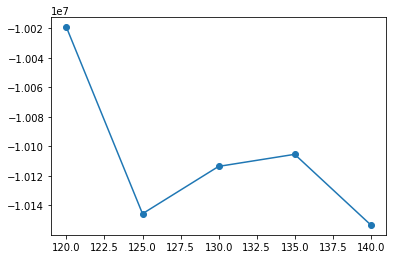

In [ ]:
plt.plot(n_components_t2, aics_t2)
plt.scatter(n_components_t2, aics_t2)
print(aics_t2)

In [ ]:
n_components_t3 = [125, 140, 145, 150, 155, 160] 
models_gmm_t3  = [GMM(n) for n in n_components_t3]
aics_t3  = [model.fit(encoded_imgs).aic(encoded_imgs) for model in models_gmm_t3]

[-10176202.989330614, -10396515.930415798, -10323551.614196554, -10236258.288219199, -10035438.396251522, -9960487.66972958]


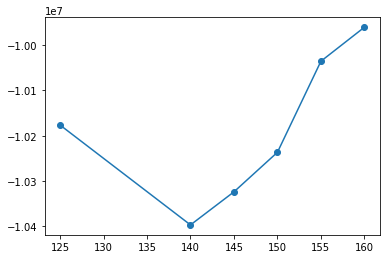

In [ ]:
plt.plot(n_components_t3, aics_t3)
plt.scatter(n_components_t3, aics_t3)
print(aics_t3)

In [125]:
# example of max pooling
from numpy import asarray
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D

In [ ]:

# define input data
data = [[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0],
		[0, 0, 0, 1, 1, 0, 0, 0]]
data = asarray(data)
data = data.reshape(1, 8, 8, 1)
print(data.shape)
# create model
model = Sequential()
model.add(Conv2D(1, (3,3), activation='relu', input_shape=(8, 8, 1)))
model.add(MaxPooling2D())
# summarize model
model.summary()


In [ ]:
# define a vertical line detector
detector = [[[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]],
            [[[0]],[[1]],[[0]]]]
weights = [asarray(detector), asarray([0.0])]
print(weights)
# store the weights in the model
model.set_weights(weights)
# apply filter to input data
yhat = model.predict(data)
# enumerate rows
for r in range(yhat.shape[1]):
	# print each column in the row
	print([yhat[0,r,c,0] for c in range(yhat.shape[2])])

In [ ]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(X_train_t1)
data.shape

In [ ]:
n_components = np.arange(50, 310, 100)
n_components

In [ ]:
n_components_1= [100]
models_1 = [GMM(n, covariance_type='full', random_state=7)
          for n in n_components_1]
aics_1 = [model.fit(data).aic(data) for model in models_1]
plt.plot(n_components_1, aics_1)

In [ ]:
(n_components_1, aics_1)

In [ ]:
gm = models_1[0]
prediction = gm.predict(data)
accuracy = accuracy_score(y_train_t1,prediction)
print(accuracy)

In [ ]:
from sklearn import random_projection

In [ ]:
transformer = random_projection.SparseRandomProjection(eps=0.55)

In [ ]:
X_new = transformer.fit_transform(X_train)

In [ ]:
X_new.shape

In [ ]:
data = X_new

In [ ]:
n_components = [10, 20, 30]

In [ ]:
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);

In [ ]:
(n_components, aics)

In [ ]:
n_components = [100, 200, 300]

In [ ]:
models_ = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics_ = [model.fit(data).aic(data) for model in models_]
plt.plot(n_components, aics_);

In [ ]:
(n_components, aics_)

In [ ]:
(n_components, aics_)

In [ ]:
prediction = models_[2].predict(X_test)

In [ ]:
accuracy_score(y_test_,prediction)

In [ ]:
pca = PCA(0.99, whiten=True)
data = pca.fit_transform(X_train)
data.shape

In [ ]:
data.shape[1]/X_train.shape[1]

In [ ]:
n_components = [1, 5, 10]

In [ ]:
n_components

In [ ]:
models = [GMM(n, covariance_type='full', random_state=0)
          for n in n_components]
aics = [model.fit(data).aic(data) for model in models]
plt.plot(n_components, aics);